**AI project 1**
Second part, Neural Network.

In [1]:


# Importing some packages / libraries that we will use during solving the project.
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

#import tensorflow as tf
#%tensorflow_version 1.x

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras
from keras.layers import Dense, Activation, Dropout



%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#Reading the dataset.
df = pd.read_csv('/content/Reduced Features for TAI project.csv')

In [5]:
df

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030210,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


I. As we defined before, we will check the how clean is the dataset.
1. Looking for nulls.
2. Looking for blank spaces.
3. Looking for repetitive columns (duplicates).

In [7]:
#Making a first visual inspection
pd.isnull(df) # or we can use the next command df.isnull() to have the same result.

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Another way to check nulls. How many nulls we have per column?
df.isnull().sum().head(50)


Patient ID                                                      0
original_shape_Elongation                                       0
original_firstorder_Kurtosis                                    0
original_firstorder_Skewness                                    0
wavelet-LHL_glrlm_RunVariance                                   0
wavelet2-LHL_gldm_LargeDependenceEmphasis                       0
wavelet2-LLH_gldm_LargeDependenceEmphasis                       0
wavelet-LHL_gldm_LargeDependenceEmphasis                        0
wavelet2-LHL_gldm_DependenceVariance                            0
wavelet2-LHL_glrlm_RunVariance                                  0
wavelet-LHL_glrlm_LongRunEmphasis                               0
wavelet-LHH_glrlm_LongRunEmphasis                               0
wavelet-LHH_glrlm_RunPercentage                                 0
wavelet2-LLH_glrlm_RunVariance                                  0
wavelet-LHH_glrlm_RunLengthNonUniformityNormalized              0
wavelet-HH

In [9]:
#Then. How many nulls we have per row?
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3557    0
3558    0
3559    0
3560    0
3561    0
Length: 3562, dtype: int64

In [10]:
#Finally we check the complete dataframe for finding nulls (the tests before were made to practice and undertand the data).
df.isnull().sum().sum()
#So, there is no null spaces.

0

In [11]:
#Another way to check nulls is to loop all the columns and create another dataframe with nulls,
#If there is not nulls "dfnulls" will be empty.
mask = False
for col in df.columns: 
    mask = mask | df[col].isnull()
dfnulls = df[mask]
dfnulls

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label


In [ ]:
#Checking the info we can see that there are 152 columns, but in the description of the problem just 150 columns are mentioned, so we will check this further.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Columns: 152 entries, Patient ID to Label
dtypes: float64(150), int64(2)
memory usage: 4.1 MB


In [12]:
#We need to check if there are duplicates, using the function ".duplicated" we are comparing the features names to check if there are some duplicates, but
# we realized that is putting 1 at the end of the name when finds a duplicated, so will not give exact results.
df.columns.duplicated() 


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
#The next code to find nulls in the features will show how ".1" was added at the end of a feature name when finding duplicates.
# Duplicated features are: original_kurtosis_Skewness.1, original_firstorder_Skewness.1
columns = df.columns
columns
for column in columns:
  if not column:
    print("null")
  else:
    print(column)


Patient ID
original_shape_Elongation
original_firstorder_Kurtosis
original_firstorder_Skewness
wavelet-LHL_glrlm_RunVariance
wavelet2-LHL_gldm_LargeDependenceEmphasis
wavelet2-LLH_gldm_LargeDependenceEmphasis
wavelet-LHL_gldm_LargeDependenceEmphasis
wavelet2-LHL_gldm_DependenceVariance
wavelet2-LHL_glrlm_RunVariance
wavelet-LHL_glrlm_LongRunEmphasis
wavelet-LHH_glrlm_LongRunEmphasis
wavelet-LHH_glrlm_RunPercentage
wavelet2-LLH_glrlm_RunVariance
wavelet-LHH_glrlm_RunLengthNonUniformityNormalized
wavelet-HHH_glrlm_LongRunEmphasis
wavelet-LHH_glrlm_RunVariance
wavelet2-LLH_glrlm_LongRunEmphasis
wavelet2-LHL_glrlm_LongRunEmphasis
wavelet-HHH_glrlm_RunVariance
wavelet2-LHH_glrlm_LongRunEmphasis
wavelet2-LHH_glrlm_RunPercentage
wavelet-LHL_glrlm_RunPercentage
wavelet-HHH_glrlm_RunLengthNonUniformityNormalized
wavelet2-HHH_glrlm_RunLengthNonUniformityNormalized
wavelet2-HHH_glrlm_RunPercentage
wavelet-LHH_glrlm_LongRunLowGrayLevelEmphasis
wavelet2-LLH_glrlm_RunPercentage
wavelet-LHH_glrlm_Sho

In [14]:
#The next code is another way to find duplicate features,but as long as df.columns put ".1" at the end when name features were duplicated, 
#this method will not work, it is important to be aware of this detail.
for i in range(len(columns)):
  for j in range(len(columns)-1):
     if((columns[i]==columns[j]) and i!=j):
      print(columns[i])
      print(columns[j])
         
    

In [15]:
#So, finally
#To recognize the duplicates we will use nested loops (not taking the variable columns anymore as we explain lines before).

duplicates = []
for col in range(df.shape[1]):
    contents = df.iloc[:, col]
    
    for comp in range(col + 1, df.shape[1]):
        if contents.equals(df.iloc[:, comp]):
            duplicates.append(comp)
            if (duplicates):
              print(contents)
duplicates = np.unique(duplicates).tolist()
#2 columns are duplicated .
  


0       2.817688
1       2.084800
2       2.590759
3       2.932863
4       2.814081
          ...   
3557    3.145095
3558    2.484876
3559    3.363199
3560    2.205947
3561    2.317722
Name: original_firstorder_Kurtosis, Length: 3562, dtype: float64
0       0.769536
1       0.442780
2       0.384512
3       0.738215
4       0.773252
          ...   
3557    0.887252
3558    0.655281
3559    1.026167
3560    0.349004
3561    0.496575
Name: original_firstorder_Skewness, Length: 3562, dtype: float64


In [16]:
#deleting duplicates
df=df.drop(df.columns[duplicates], axis=1)
df

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030210,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [17]:
#Now, it is time to check numerical and categorical values (If we have categorical value we will ).
numeric_cols=df.select_dtypes(include=[np.number]).columns.tolist()[:-1]
categorical_cols=df.select_dtypes('object').columns.tolist()[:-1]
categorical_cols

[]

In [18]:
numeric_cols

['Patient ID',
 'original_shape_Elongation',
 'original_firstorder_Kurtosis',
 'original_firstorder_Skewness',
 'wavelet-LHL_glrlm_RunVariance',
 'wavelet2-LHL_gldm_LargeDependenceEmphasis',
 'wavelet2-LLH_gldm_LargeDependenceEmphasis',
 'wavelet-LHL_gldm_LargeDependenceEmphasis',
 'wavelet2-LHL_gldm_DependenceVariance',
 'wavelet2-LHL_glrlm_RunVariance',
 'wavelet-LHL_glrlm_LongRunEmphasis',
 'wavelet-LHH_glrlm_LongRunEmphasis',
 'wavelet-LHH_glrlm_RunPercentage',
 'wavelet2-LLH_glrlm_RunVariance',
 'wavelet-LHH_glrlm_RunLengthNonUniformityNormalized',
 'wavelet-HHH_glrlm_LongRunEmphasis',
 'wavelet-LHH_glrlm_RunVariance',
 'wavelet2-LLH_glrlm_LongRunEmphasis',
 'wavelet2-LHL_glrlm_LongRunEmphasis',
 'wavelet-HHH_glrlm_RunVariance',
 'wavelet2-LHH_glrlm_LongRunEmphasis',
 'wavelet2-LHH_glrlm_RunPercentage',
 'wavelet-LHL_glrlm_RunPercentage',
 'wavelet-HHH_glrlm_RunLengthNonUniformityNormalized',
 'wavelet2-HHH_glrlm_RunLengthNonUniformityNormalized',
 'wavelet2-HHH_glrlm_RunPercentag

In [19]:
#We do not have categorical values.

In [20]:
df.dtypes

Patient ID                                   int64
original_shape_Elongation                  float64
original_firstorder_Kurtosis               float64
original_firstorder_Skewness               float64
wavelet-LHL_glrlm_RunVariance              float64
                                            ...   
original_shape_SphericalDisproportion      float64
wavelet2-HHL_glcm_Idmn                     float64
wavelet2-LHH_firstorder_RootMeanSquared    float64
wavelet2-HLL_firstorder_Maximum            float64
Label                                        int64
Length: 150, dtype: object

In [21]:
#checking some detailed data of the dataframe.
df[numeric_cols].describe()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,...,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,43.568782,0.666190,2.462975,0.590587,4.212117,1497.921542,1594.268004,2119.089859,271.458163,2.968610,...,9.493928,263.808079,0.351824,3.164037,0.159556,0.458397,1.292847,0.931269,0.905466,73.400175
std,24.574284,0.168063,0.546251,0.272699,4.286353,1289.535822,1387.119079,1528.700938,218.219184,3.454322,...,8.463617,2184.304828,0.216732,1.182988,0.162182,0.243215,0.247532,0.035136,0.512119,81.520035
min,1.000000,0.039069,0.000000,-1.005865,0.083283,1.000000,1.000000,1.000000,0.000000,0.054849,...,2.040067,0.030881,0.058536,1.284810,0.000000,0.122810,0.907201,0.811843,0.234128,3.099939
25%,28.000000,0.550945,2.153519,0.450615,0.963731,316.233814,327.236986,637.213037,54.969021,0.654501,...,6.113958,10.276716,0.191192,2.531290,0.043387,0.322079,1.154897,0.902421,0.628734,22.119894
50%,41.000000,0.677985,2.371766,0.580983,2.686606,1247.979233,1297.284496,2121.746770,249.695632,1.718228,...,8.837889,31.876325,0.295743,2.917387,0.086336,0.410345,1.224399,0.920535,0.801215,35.270240
75%,63.000000,0.793857,2.665746,0.726457,6.188729,2428.843419,2579.808868,3397.403762,453.547995,3.987678,...,11.523476,111.915767,0.468013,3.432697,0.248412,0.530553,1.356257,0.962220,1.035546,102.038460
max,96.000000,1.000000,8.111111,2.666667,29.198575,6454.319835,6484.443965,6308.111352,913.448742,31.799360,...,295.617964,99073.022880,2.957963,22.889047,0.929873,5.265915,3.486119,1.000000,9.730689,675.982582


In [22]:
#Find the min and max value of each column to see if it is necesarry normalize to avoid outliers.
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


df.apply(minMax)


,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
min,1,0.039069,0.000000,-1.005865,0.083283,1.000000,1.000000,1.000000,0.000000,0.054849,...,0.030881,0.058536,1.284810,0.000000,0.122810,0.907201,0.811843,0.234128,3.099939,0
max,96,1.000000,8.111111,2.666667,29.198575,6454.319835,6484.443965,6308.111352,913.448742,31.799360,...,99073.022880,2.957963,22.889047,0.929873,5.265915,3.486119,1.000000,9.730689,675.982582,1


In [23]:

# As we saw the samples are hihgly dispersed in most of the cases, so we decided to normalize all the features except the patient ID. 
#First, splitting the dataframe to take out the patient ID
df_rest = df.iloc[:, 1:]
df_rest

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,...,63032.030210,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [24]:
#Normalizing data with formula
normalized_df=(df_rest-df_rest.min())/(df_rest.max()-df_rest.min())
normalized_df

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,0.647935,0.347386,0.483427,0.246393,0.523875,0.572856,0.562194,0.694892,0.208769,0.213138,...,0.040427,0.120865,0.077050,0.248931,0.068252,0.257965,0.914185,0.067492,0.207713,0.0
1,0.740719,0.257030,0.394454,0.104909,0.411077,0.222520,0.364082,0.674761,0.127287,0.102379,...,0.000323,0.077075,0.069708,0.011325,0.054280,0.105061,0.495763,0.048711,0.027632,0.0
2,0.604322,0.319409,0.378588,0.237749,0.550124,0.550291,0.529857,0.467088,0.267165,0.208145,...,0.636218,0.132566,0.089165,0.297037,0.062854,0.274669,0.963087,0.063055,0.237693,0.0
3,0.363880,0.361586,0.474899,0.071974,0.242207,0.211163,0.291565,0.348265,0.059370,0.091643,...,0.001490,0.093676,0.081909,0.025670,0.053887,0.154981,0.527741,0.051980,0.029544,0.0
4,0.813234,0.346942,0.484439,0.042368,0.213376,0.154949,0.184522,0.356313,0.052668,0.052740,...,0.000665,0.075847,0.036533,0.018253,0.044263,0.100246,0.503155,0.039238,0.031789,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.193591,0.387751,0.515480,0.014555,0.017436,0.009608,0.024941,0.023203,0.011527,0.026068,...,0.000223,0.031002,0.050876,0.026926,0.022047,0.195908,0.598221,0.043711,0.035920,1.0
3558,0.483669,0.306355,0.452316,0.156548,0.383423,0.427313,0.425445,0.628523,0.142924,0.143765,...,0.004544,0.118949,0.093819,0.587706,0.053980,0.227915,0.958770,0.052653,0.424309,1.0
3559,0.432556,0.414641,0.553306,0.203718,0.512826,0.220466,0.560625,0.600126,0.174533,0.233783,...,0.003397,0.019402,0.085132,0.030843,0.038238,0.272384,0.444693,0.034998,0.017422,1.0
3560,0.608817,0.271966,0.368920,0.053013,0.142571,0.043139,0.165679,0.162946,0.048167,0.074237,...,0.000145,0.025269,0.041202,0.078155,0.025616,0.144781,0.442866,0.032420,0.017941,1.0


In [25]:
#Normalizing data with the mean
normalized_df1=(df_rest-df_rest.mean())/df_rest.std()
normalized_df1
#sklearn min max scaler, standar scaler

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,-0.026774,0.649358,0.656216,0.710385,1.460846,1.528931,0.933949,1.664795,1.075035,0.562085,...,1.712857,0.263693,-0.181432,0.443441,0.063486,1.129655,1.496586,-0.059347,0.852134,-0.873586
1,0.503735,-0.692311,-0.542013,-0.250649,0.896359,-0.108549,0.116580,1.580527,0.326230,-0.318952,...,-0.106098,-0.322124,-0.315505,-0.918873,-0.231966,-0.463389,-0.744101,-0.407622,-0.634287,-0.873586
2,-0.276141,0.233928,-0.755685,0.651672,1.592204,1.423463,0.800533,0.711226,1.611679,0.522370,...,28.736018,0.420237,0.039830,0.719258,-0.050659,1.303684,1.758461,-0.141624,1.099601,-0.873586
3,-1.650908,0.860205,0.541361,-0.474366,0.051273,-0.161631,-0.182612,0.213841,-0.297910,-0.404346,...,-0.053179,-0.100036,-0.092677,-0.836625,-0.240280,0.056711,-0.572854,-0.346995,-0.618506,-0.873586
4,0.918350,0.642756,0.669842,-0.675462,-0.093010,-0.424380,-0.624249,0.247528,-0.359502,-0.713807,...,-0.090617,-0.338550,-0.921363,-0.879153,-0.443797,-0.513550,-0.704513,-0.583289,-0.599973,-0.873586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,-2.624565,1.248730,1.087886,-0.864389,-1.073564,-1.103711,-1.282648,-1.146844,-0.737581,-0.925964,...,-0.110631,-0.938486,-0.659426,-0.829424,-0.913591,0.483105,-0.195426,-0.500346,-0.565873,1.144386
3558,-0.965991,0.040093,0.237240,0.100109,0.757969,0.848661,0.369750,1.386981,0.469927,0.010260,...,0.085320,0.238069,0.124829,2.385812,-0.238310,0.816573,1.735344,-0.334521,2.639965,1.144386
3559,-1.258240,1.648004,1.597297,0.420516,1.405551,-0.118150,0.927477,1.268112,0.760414,0.726312,...,0.033309,-1.093673,-0.033834,-0.806968,-0.571193,1.279873,-1.017584,-0.661913,-0.718561,1.144386
3560,-0.250437,-0.470533,-0.885894,-0.603157,-0.447343,-0.946983,-0.701990,-0.561891,-0.400864,-0.542809,...,-0.114174,-1.015187,-0.836090,-0.535705,-0.838106,-0.049558,-1.027371,-0.709713,-0.714281,1.144386


In [27]:
#Normalizing with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#?MinMaxScaler #MinMaxKiller
scaler=MinMaxScaler()


In [28]:
df_rest

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,...,63032.030210,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [29]:
numeric_cols=df_rest.select_dtypes(include=[np.number]).columns.tolist()[:-1]
categorical_cols=df_rest.select_dtypes('object').columns.tolist()[:-1]
df_rest[numeric_cols] #The target is not shown.

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
0,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,...,13.110078,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201
1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,...,10.093049,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040
2,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,...,15.769474,63032.030210,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718
3,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,...,8.035637,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554
4,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,...,7.530571,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,...,4.661980,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149
3558,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,...,14.885005,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250
3559,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,...,9.323565,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064
3560,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,...,5.706850,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972


In [30]:
scaler.fit(df_rest[numeric_cols])
print('Minimun:')
list(scaler.data_min_)

Minimun:


[0.039069481,
 0.0,
 -1.005865034,
 0.083282609,
 1.0,
 1.0,
 1.0,
 0.0,
 0.054848871,
 1.256063403,
 1.242668621,
 0.591714057,
 0.043978112,
 0.260873676,
 1.241962784,
 0.074346423,
 1.138310978,
 1.169978542,
 0.074149151,
 1.224794964,
 0.447954175,
 0.205851852,
 0.259473455,
 0.199745732,
 0.474746943,
 0.181023865,
 0.230206996,
 0.452364026,
 0.180402518,
 0.097618875,
 0.347117296,
 0.163634848,
 0.023004766,
 0.377837776,
 0.542631658,
 0.260196505,
 0.132169128,
 0.089431474,
 0.041256291,
 1.142833947,
 0.323689643,
 0.106866347,
 0.16699449,
 0.07925219,
 0.092229114,
 1.818181818,
 0.200007303,
 0.251509108,
 0.127891231,
 8.2,
 0.797722406,
 0.27527163,
 1.255905563,
 0.294170935,
 0.308837752,
 1.194673644,
 0.415369028,
 0.082043457,
 0.143128165,
 0.005008619,
 0.107257868,
 0.089784755,
 0.030834974,
 0.100538426,
 0.036237224,
 0.143833192,
 0.204007295,
 0.145650491,
 0.004682234,
 0.090344365,
 0.952273977,
 0.226367679,
 1.319512114,
 0.83495156,
 0.158352437,
 

In [31]:
print('Maximun:')
list(scaler.data_max_)

Maximun:


[1.0,
 8.111111111,
 2.666666667,
 29.19857454,
 6454.319835,
 6484.443965,
 6308.111352,
 913.4487421,
 31.7993602,
 71.41160936,
 9.146342324,
 1.302551749,
 42.68815277,
 0.851307155,
 9.685075321,
 4.308839699,
 80.5453299,
 81.95197195,
 4.228855538,
 17.08788702,
 1.319061475,
 1.287167134,
 0.896791006,
 0.84042849,
 1.269432968,
 5.144377939,
 1.335288212,
 0.939332845,
 0.898237311,
 1.265152342,
 0.958881755,
 1.0,
 24.64297141,
 0.93349039,
 1.287167134,
 1.220767081,
 0.780363463,
 0.922770061,
 0.91708101,
 37.72645379,
 0.904764514,
 0.922265217,
 5.850159414,
 0.853357632,
 0.891170951,
 7625.933059,
 1.345324657,
 1.339090066,
 0.923788619,
 158649.7908,
 4.91997712,
 3934.00346,
 41.24994551,
 1.355814551,
 1.304036803,
 3.335708016,
 0.956522408,
 0.909709202,
 4.986493992,
 21.91091064,
 2.727469561,
 2.51109815,
 3297.60587,
 0.968177281,
 29.95849386,
 6.491364538,
 0.969140718,
 4.390209302,
 0.857100635,
 0.939991525,
 3.380427545,
 0.967242756,
 32.69392304,
 3.

In [32]:

df_rest[numeric_cols]=scaler.transform(df_rest[numeric_cols])

In [33]:
#df_rest = pd.DataFrame(scaler.transform(df_rest), columns =df_rest.columns)
#df_rest Using tha Target, the target get damaged.
df_rest[numeric_cols]

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
0,0.647935,0.347386,0.483427,0.246393,0.523875,0.572856,0.562194,0.694892,0.208769,0.213138,...,0.037707,0.040427,0.120865,0.077050,0.248931,0.068252,0.257965,0.914185,0.067492,0.207713
1,0.740719,0.257030,0.394454,0.104909,0.411077,0.222520,0.364082,0.674761,0.127287,0.102379,...,0.027430,0.000323,0.077075,0.069708,0.011325,0.054280,0.105061,0.495763,0.048711,0.027632
2,0.604322,0.319409,0.378588,0.237749,0.550124,0.550291,0.529857,0.467088,0.267165,0.208145,...,0.046766,0.636218,0.132566,0.089165,0.297037,0.062854,0.274669,0.963087,0.063055,0.237693
3,0.363880,0.361586,0.474899,0.071974,0.242207,0.211163,0.291565,0.348265,0.059370,0.091643,...,0.020422,0.001490,0.093676,0.081909,0.025670,0.053887,0.154981,0.527741,0.051980,0.029544
4,0.813234,0.346942,0.484439,0.042368,0.213376,0.154949,0.184522,0.356313,0.052668,0.052740,...,0.018702,0.000665,0.075847,0.036533,0.018253,0.044263,0.100246,0.503155,0.039238,0.031789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.193591,0.387751,0.515480,0.014555,0.017436,0.009608,0.024941,0.023203,0.011527,0.026068,...,0.008931,0.000223,0.031002,0.050876,0.026926,0.022047,0.195908,0.598221,0.043711,0.035920
3558,0.483669,0.306355,0.452316,0.156548,0.383423,0.427313,0.425445,0.628523,0.142924,0.143765,...,0.043753,0.004544,0.118949,0.093819,0.587706,0.053980,0.227915,0.958770,0.052653,0.424309
3559,0.432556,0.414641,0.553306,0.203718,0.512826,0.220466,0.560625,0.600126,0.174533,0.233783,...,0.024809,0.003397,0.019402,0.085132,0.030843,0.038238,0.272384,0.444693,0.034998,0.017422
3560,0.608817,0.271966,0.368920,0.053013,0.142571,0.043139,0.165679,0.162946,0.048167,0.074237,...,0.012490,0.000145,0.025269,0.041202,0.078155,0.025616,0.144781,0.442866,0.032420,0.017941


In [34]:
df_rest[numeric_cols].describe()

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,...,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,0.652618,0.303655,0.434701,0.141810,0.231961,0.245744,0.335826,0.297179,0.091788,0.142475,...,0.025390,0.002662,0.101154,0.086984,0.171589,0.065250,0.149538,0.634715,0.070693,0.104476
std,0.174896,0.067346,0.074254,0.147220,0.199825,0.213948,0.242377,0.238896,0.108816,0.125714,...,0.028829,0.022047,0.074750,0.054757,0.174413,0.047290,0.095983,0.186738,0.053927,0.121150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.532688,0.265502,0.396587,0.030240,0.048848,0.050318,0.100872,0.060177,0.018890,0.043682,...,0.013877,0.000103,0.045753,0.057696,0.046659,0.038745,0.096046,0.481399,0.041553,0.028266
50%,0.664892,0.292409,0.432086,0.089414,0.193231,0.199938,0.336247,0.273355,0.052399,0.109355,...,0.023155,0.000321,0.081812,0.075567,0.092847,0.055907,0.122996,0.577666,0.059715,0.047810
75%,0.785476,0.328654,0.471697,0.209699,0.376216,0.397753,0.538504,0.496523,0.123890,0.208224,...,0.032303,0.001129,0.141227,0.099420,0.267146,0.079279,0.174125,0.799209,0.084390,0.147037
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_rest[numeric_cols]

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
0,0.647935,0.347386,0.483427,0.246393,0.523875,0.572856,0.562194,0.694892,0.208769,0.213138,...,0.037707,0.040427,0.120865,0.077050,0.248931,0.068252,0.257965,0.914185,0.067492,0.207713
1,0.740719,0.257030,0.394454,0.104909,0.411077,0.222520,0.364082,0.674761,0.127287,0.102379,...,0.027430,0.000323,0.077075,0.069708,0.011325,0.054280,0.105061,0.495763,0.048711,0.027632
2,0.604322,0.319409,0.378588,0.237749,0.550124,0.550291,0.529857,0.467088,0.267165,0.208145,...,0.046766,0.636218,0.132566,0.089165,0.297037,0.062854,0.274669,0.963087,0.063055,0.237693
3,0.363880,0.361586,0.474899,0.071974,0.242207,0.211163,0.291565,0.348265,0.059370,0.091643,...,0.020422,0.001490,0.093676,0.081909,0.025670,0.053887,0.154981,0.527741,0.051980,0.029544
4,0.813234,0.346942,0.484439,0.042368,0.213376,0.154949,0.184522,0.356313,0.052668,0.052740,...,0.018702,0.000665,0.075847,0.036533,0.018253,0.044263,0.100246,0.503155,0.039238,0.031789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.193591,0.387751,0.515480,0.014555,0.017436,0.009608,0.024941,0.023203,0.011527,0.026068,...,0.008931,0.000223,0.031002,0.050876,0.026926,0.022047,0.195908,0.598221,0.043711,0.035920
3558,0.483669,0.306355,0.452316,0.156548,0.383423,0.427313,0.425445,0.628523,0.142924,0.143765,...,0.043753,0.004544,0.118949,0.093819,0.587706,0.053980,0.227915,0.958770,0.052653,0.424309
3559,0.432556,0.414641,0.553306,0.203718,0.512826,0.220466,0.560625,0.600126,0.174533,0.233783,...,0.024809,0.003397,0.019402,0.085132,0.030843,0.038238,0.272384,0.444693,0.034998,0.017422
3560,0.608817,0.271966,0.368920,0.053013,0.142571,0.043139,0.165679,0.162946,0.048167,0.074237,...,0.012490,0.000145,0.025269,0.041202,0.078155,0.025616,0.144781,0.442866,0.032420,0.017941


In [36]:
df_rest.describe()


,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,...,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,0.652618,0.303655,0.434701,0.141810,0.231961,0.245744,0.335826,0.297179,0.091788,0.142475,...,0.002662,0.101154,0.086984,0.171589,0.065250,0.149538,0.634715,0.070693,0.104476,0.432903
std,0.174896,0.067346,0.074254,0.147220,0.199825,0.213948,0.242377,0.238896,0.108816,0.125714,...,0.022047,0.074750,0.054757,0.174413,0.047290,0.095983,0.186738,0.053927,0.121150,0.495547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.532688,0.265502,0.396587,0.030240,0.048848,0.050318,0.100872,0.060177,0.018890,0.043682,...,0.000103,0.045753,0.057696,0.046659,0.038745,0.096046,0.481399,0.041553,0.028266,0.000000
50%,0.664892,0.292409,0.432086,0.089414,0.193231,0.199938,0.336247,0.273355,0.052399,0.109355,...,0.000321,0.081812,0.075567,0.092847,0.055907,0.122996,0.577666,0.059715,0.047810,0.000000
75%,0.785476,0.328654,0.471697,0.209699,0.376216,0.397753,0.538504,0.496523,0.123890,0.208224,...,0.001129,0.141227,0.099420,0.267146,0.079279,0.174125,0.799209,0.084390,0.147037,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#First try.
train_val_df, test_df=train_test_split(df_rest,test_size=0.2,random_state=42)
#with random_state every time that run will pick the same data to know if we are really improving in performance
#even make run many times.
train_df, val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)
print('train_df shape:',train_df.shape)
print('val_df shape:',val_df.shape)
print('test_df shape:',test_df.shape)

train_df shape: (2136, 149)
val_df shape: (713, 149)
test_df shape: (713, 149)


In [38]:
input_cols=list(train_df.columns)[0:-1]
target_col='Label'
print(input_cols)

['original_shape_Elongation', 'original_firstorder_Kurtosis', 'original_firstorder_Skewness', 'wavelet-LHL_glrlm_RunVariance', 'wavelet2-LHL_gldm_LargeDependenceEmphasis', 'wavelet2-LLH_gldm_LargeDependenceEmphasis', 'wavelet-LHL_gldm_LargeDependenceEmphasis', 'wavelet2-LHL_gldm_DependenceVariance', 'wavelet2-LHL_glrlm_RunVariance', 'wavelet-LHL_glrlm_LongRunEmphasis', 'wavelet-LHH_glrlm_LongRunEmphasis', 'wavelet-LHH_glrlm_RunPercentage', 'wavelet2-LLH_glrlm_RunVariance', 'wavelet-LHH_glrlm_RunLengthNonUniformityNormalized', 'wavelet-HHH_glrlm_LongRunEmphasis', 'wavelet-LHH_glrlm_RunVariance', 'wavelet2-LLH_glrlm_LongRunEmphasis', 'wavelet2-LHL_glrlm_LongRunEmphasis', 'wavelet-HHH_glrlm_RunVariance', 'wavelet2-LHH_glrlm_LongRunEmphasis', 'wavelet2-LHH_glrlm_RunPercentage', 'wavelet-LHL_glrlm_RunPercentage', 'wavelet-HHH_glrlm_RunLengthNonUniformityNormalized', 'wavelet2-HHH_glrlm_RunLengthNonUniformityNormalized', 'wavelet2-HHH_glrlm_RunPercentage', 'wavelet-LHH_glrlm_LongRunLowGrayLe

Neural Network

In [98]:
from keras.models import Sequential
import math
#Keras makes deep learning easy
#https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
#https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/
model_NN = Sequential() #makes easy to add layers
model_NN.add(Dense(13,input_shape=(148,), activation='relu'))#Rectify linear unit
model_NN.add(Dropout(0.2))#lets dropout 20 percent of our conection randomly.
Hidden_nodes= math.sqrt(13)#Era 13*1
model_NN.add(Dense(Hidden_nodes, activation='relu'))
model_NN.add(Dense(Hidden_nodes, activation='relu'))
model_NN.add(Dense(1, activation='sigmoid'))#For the last layer.
model_NN.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
 
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_NN.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 13)                1937      
                                                                 
 dropout_5 (Dropout)         (None, 13)                0         
                                                                 
 dense_12 (Dense)            (None, 3)                 42        
                                                                 
 dense_13 (Dense)            (None, 3)                 12        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1,995
Trainable params: 1,995
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [99]:
#We will copy the datasets to modify them
train_inputs_NN=train_df[input_cols].copy()
train_targets_NN=train_df[target_col].copy()

val_inputs_NN=val_df[input_cols].copy()
val_targets_NN=val_df[target_col].copy()

test_inputs_NN=test_df[input_cols].copy()
test_targets_NN=test_df[target_col].copy()

In [100]:
#Make predictions and evaluating the model
X_train_NN=train_inputs_NN[numeric_cols]
X_val_NN=val_inputs_NN[numeric_cols]
X_test_NN=test_inputs_NN[numeric_cols]

In [101]:
#Fit with no early stopping or other callbacks
history = model_NN.fit(X_train_NN, train_targets_NN, verbose=1, epochs=100, batch_size=64,
                    validation_data=(val_inputs_NN, val_targets_NN))

Epoch 1/100
34/34 [==============================] - 2s 40ms/step - loss: 0.6914 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.6648
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.6016 - val_loss: 0.6802 - val_accuracy: 0.6676
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.6808 - accuracy: 0.6184 - val_loss: 0.6720 - val_accuracy: 0.6606
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 0.6739 - accuracy: 0.6316 - val_loss: 0.6623 - val_accuracy: 0.6872
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.6658 - accuracy: 0.6386 - val_loss: 0.6496 - val_accuracy: 0.6844
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.6447 - val_loss: 0.6379 - val_accuracy: 0.6957
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.6500 - accuracy: 0.6442 - val_loss: 0.6243 - val_accuracy: 0.6886
Epoch 8/100


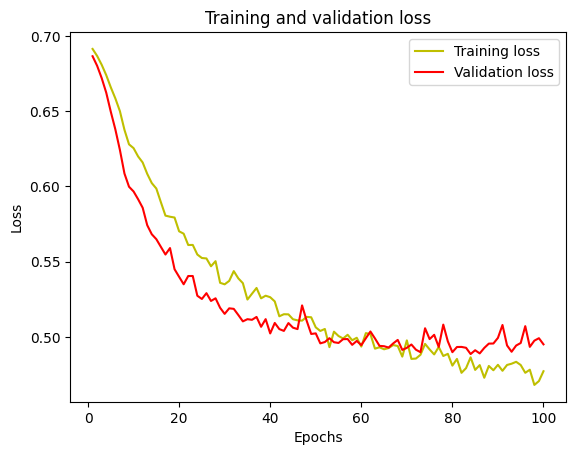

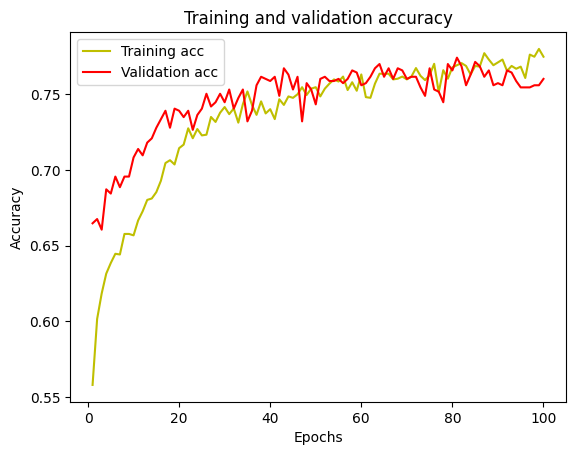

In [102]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 [==============================] - 0s 1ms/step


<Axes: >

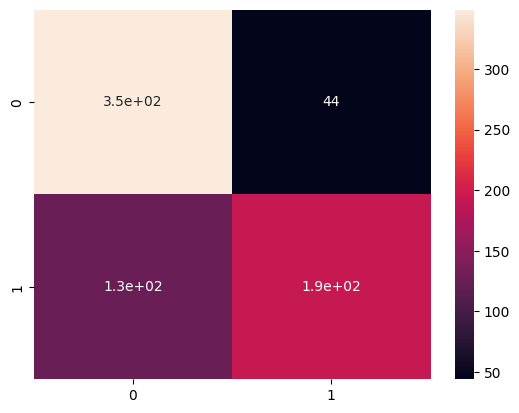

In [103]:
# Predicting the Test set results
y_pred = model_NN.predict(X_val_NN)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_targets_NN, y_pred)

sns.heatmap(cm, annot=True)